In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plot styles for better aesthetics
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Display the first 5 rows to get a feel for the data
print("First 5 rows of the Titanic dataset:")
display(df.head())

# Get a concise summary of the dataframe
print("\nDataset Information:")
df.info()


First 5 rows of the Titanic dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [2]:
# Summary statistics for numerical features
print("Descriptive Statistics for Numerical Features:")
display(df.describe())

# Summary statistics for categorical features
print("\nDescriptive Statistics for Categorical Features:")
display(df.describe(include=['object', 'category']))


Descriptive Statistics for Numerical Features:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Descriptive Statistics for Categorical Features:


,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


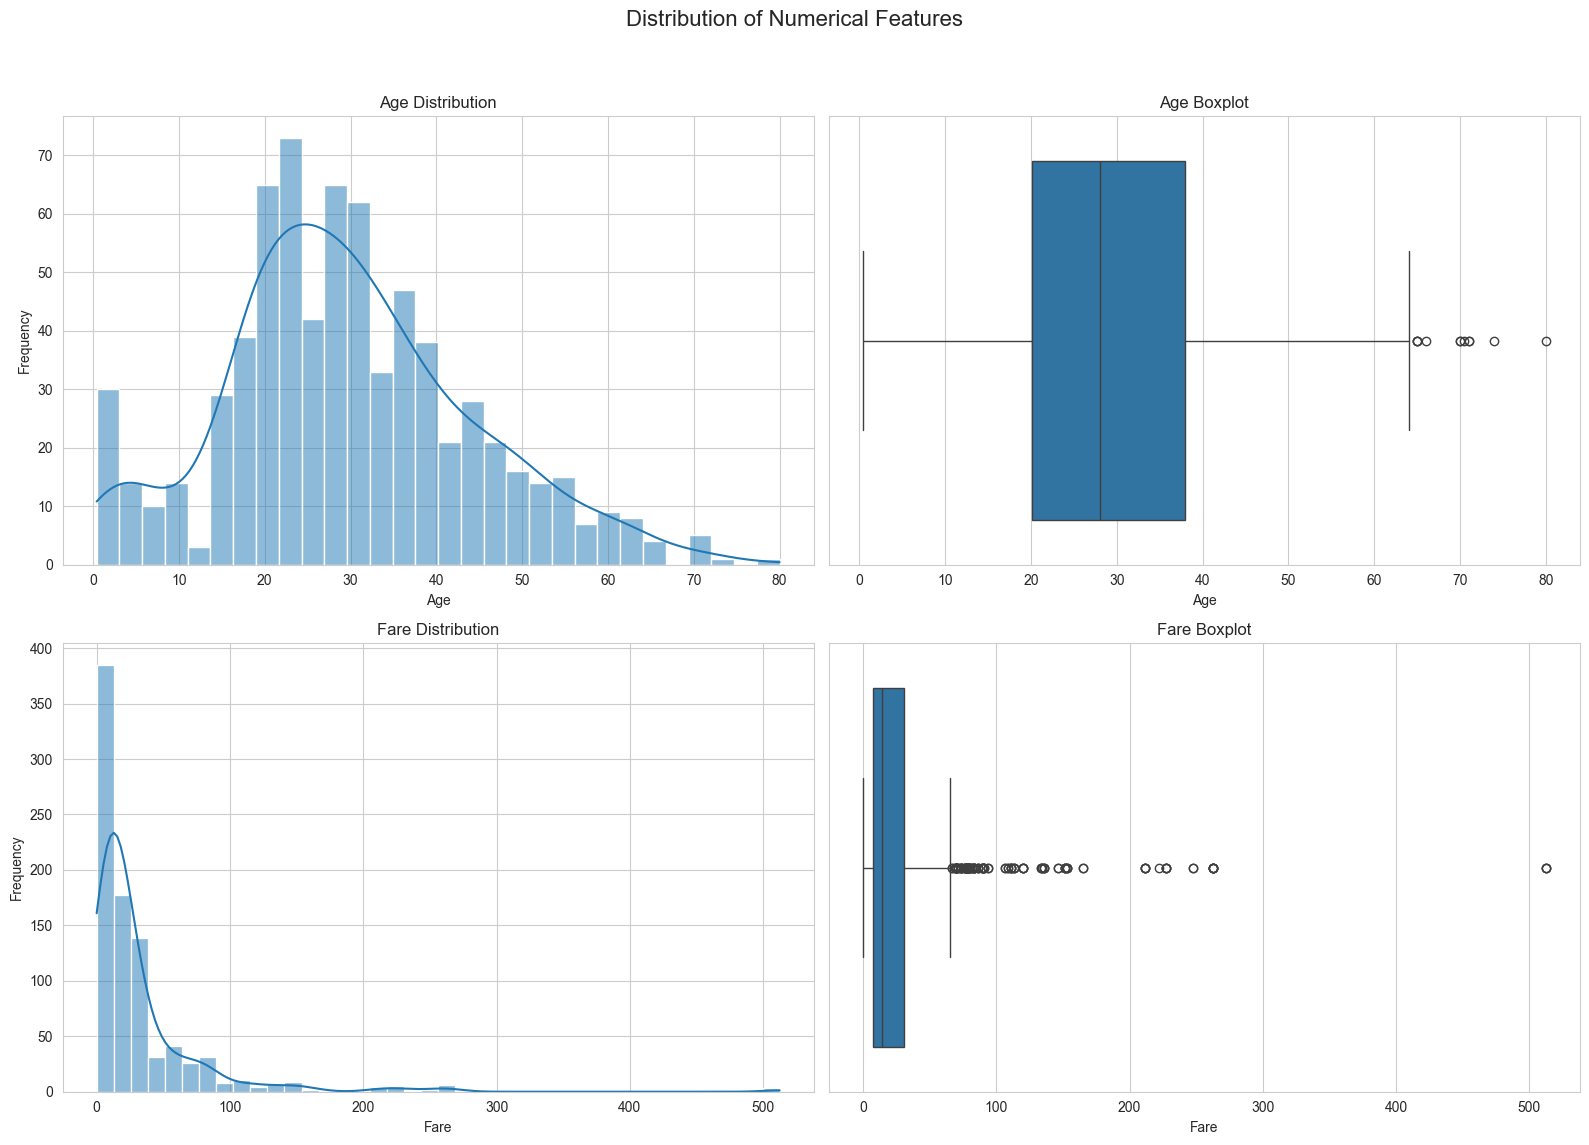

In [3]:
# Plotting distributions for numerical features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

# Histogram for Age
sns.histplot(df['age'].dropna(), kde=True, ax=axes[0, 0], bins=30)
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')


# Boxplot for Age
sns.boxplot(x=df['age'], ax=axes[0, 1])
axes[0, 1].set_title('Age Boxplot')
axes[0, 1].set_xlabel('Age')

# Histogram for Fare
sns.histplot(df['fare'], kde=True, ax=axes[1, 0], bins=40)
axes[1, 0].set_title('Fare Distribution')
axes[1, 0].set_xlabel('Fare')
axes[1, 0].set_ylabel('Frequency')

# Boxplot for Fare
sns.boxplot(x=df['fare'], ax=axes[1, 1])
axes[1, 1].set_title('Fare Boxplot')
axes[1, 1].set_xlabel('Fare')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


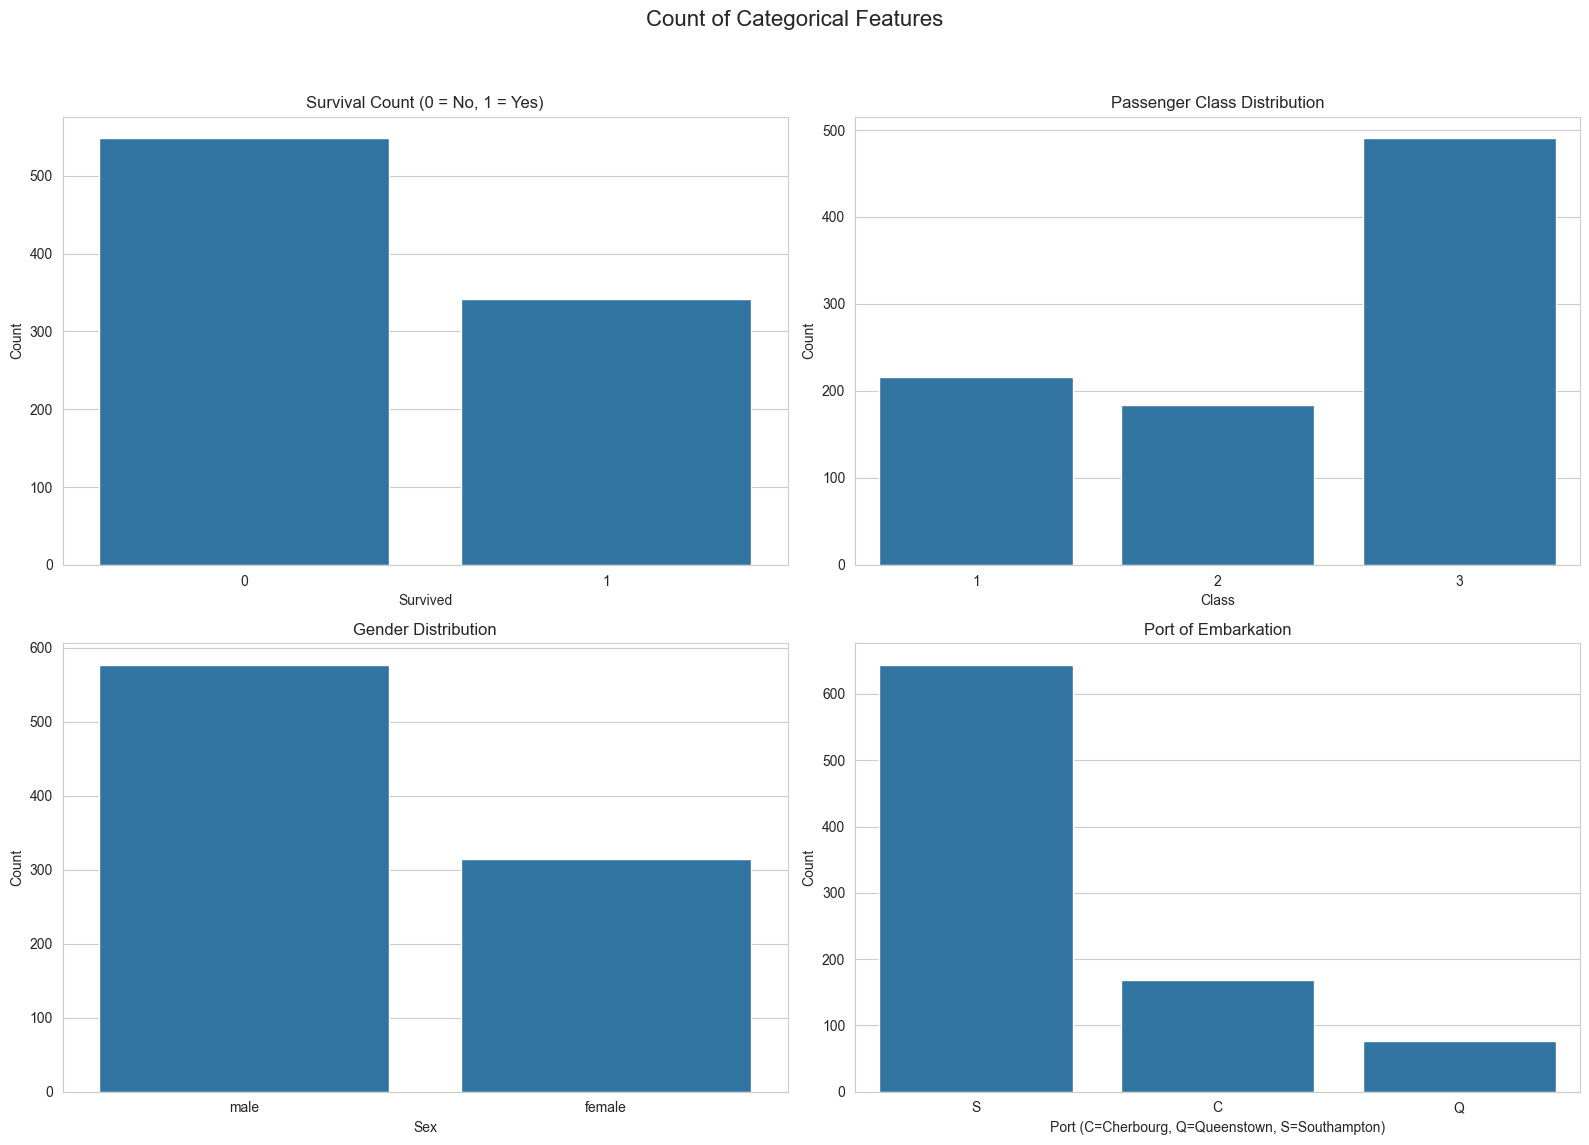

In [4]:
# Creating count plots for key categorical features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Count of Categorical Features', fontsize=16)

# Survived
sns.countplot(x='survived', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Survival Count (0 = No, 1 = Yes)')
axes[0, 0].set_xlabel('Survived')
axes[0, 0].set_ylabel('Count')


# Pclass (Passenger Class)
sns.countplot(x='pclass', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Passenger Class Distribution')
axes[0, 1].set_xlabel('Class')
axes[0, 1].set_ylabel('Count')


# Sex
sns.countplot(x='sex', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Count')


# Embarked
sns.countplot(x='embarked', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Port of Embarkation')
axes[1, 1].set_xlabel('Port (C=Cherbourg, Q=Queenstown, S=Southampton)')
axes[1, 1].set_ylabel('Count')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


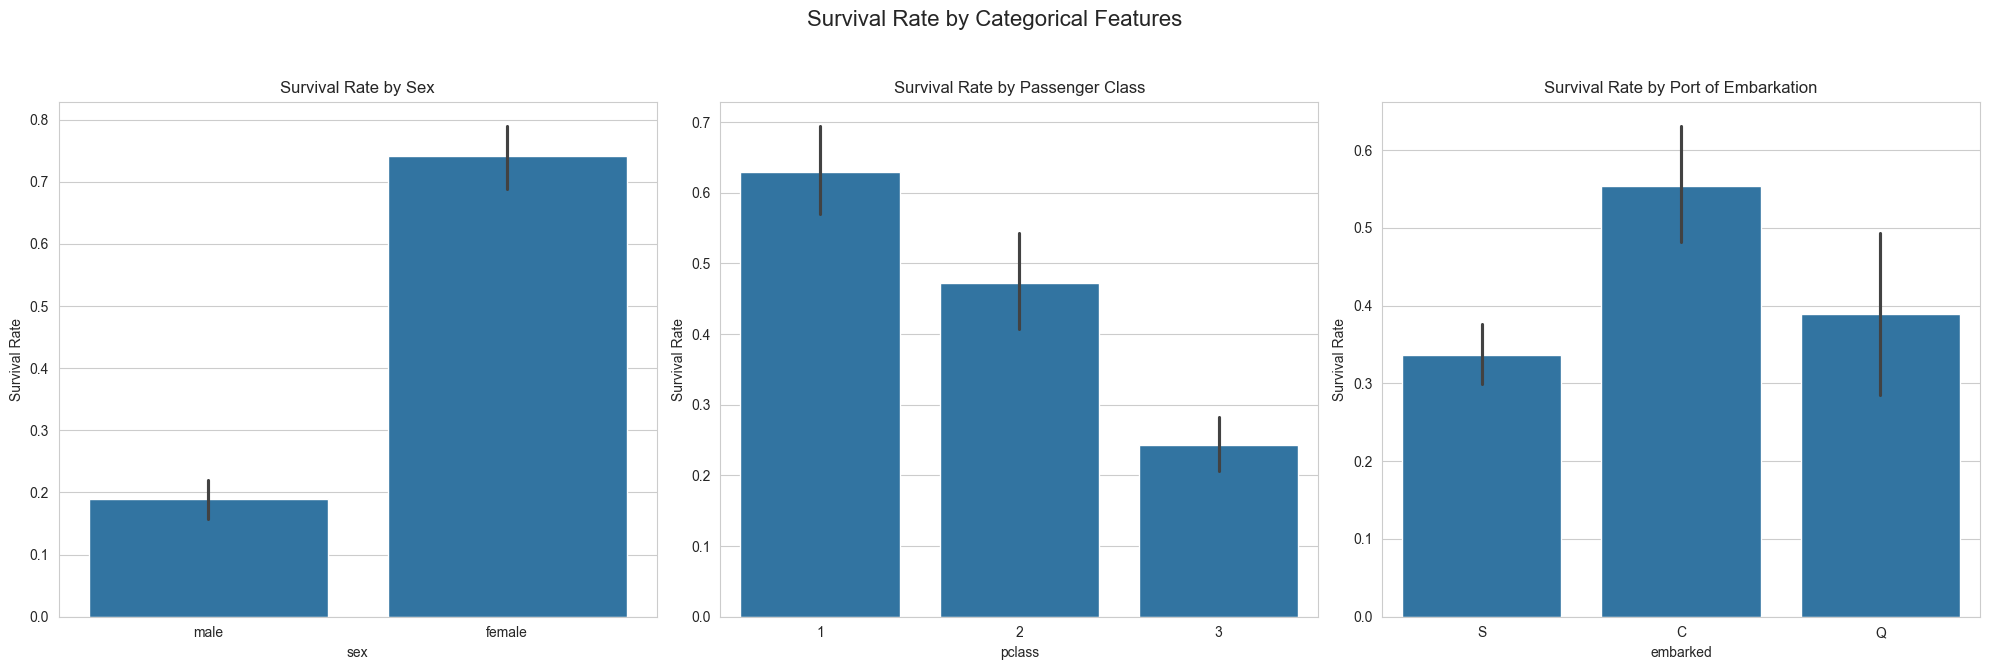

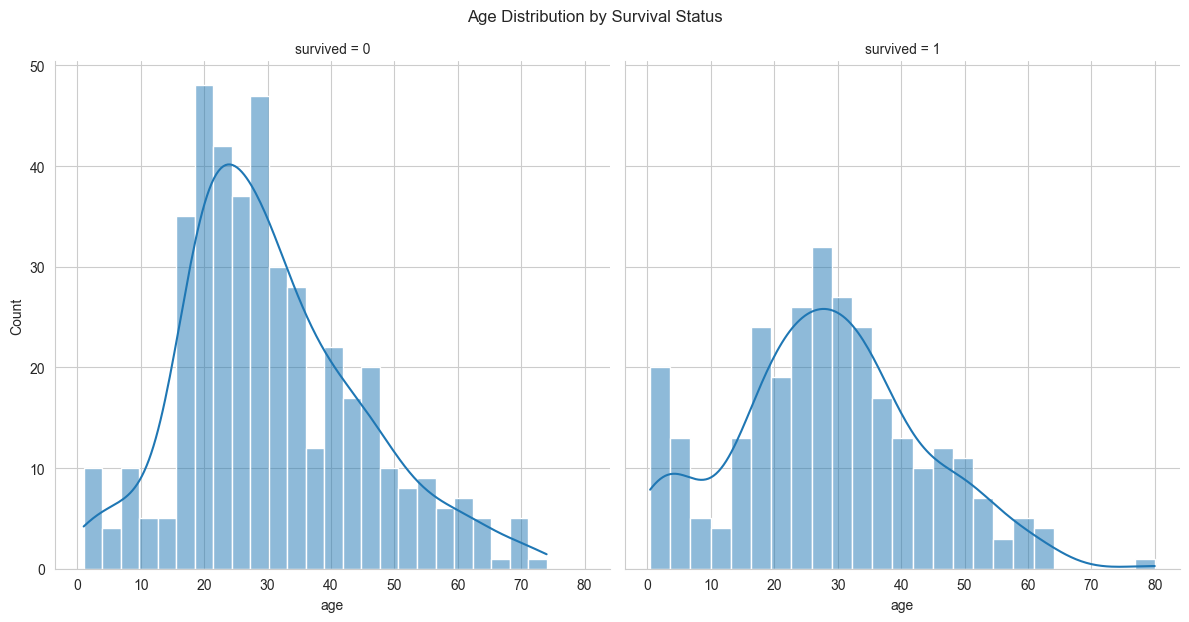

In [5]:
# Bivariate analysis: Feature vs. Survival
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Survival Rate by Categorical Features', fontsize=16)

# Survival rate by Sex
sns.barplot(x='sex', y='survived', data=df, ax=axes[0])
axes[0].set_title('Survival Rate by Sex')
axes[0].set_ylabel('Survival Rate')

# Survival rate by Pclass
sns.barplot(x='pclass', y='survived', data=df, ax=axes[1])
axes[1].set_title('Survival Rate by Passenger Class')
axes[1].set_ylabel('Survival Rate')

# Survival rate by Embarked
sns.barplot(x='embarked', y='survived', data=df, ax=axes[2])
axes[2].set_title('Survival Rate by Port of Embarkation')
axes[2].set_ylabel('Survival Rate')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Age distribution vs. Survival
g = sns.FacetGrid(df, col='survived', height=6)
g.map(sns.histplot, 'age', kde=True, bins=25)
g.fig.suptitle('Age Distribution by Survival Status', y=1.03)
plt.show()


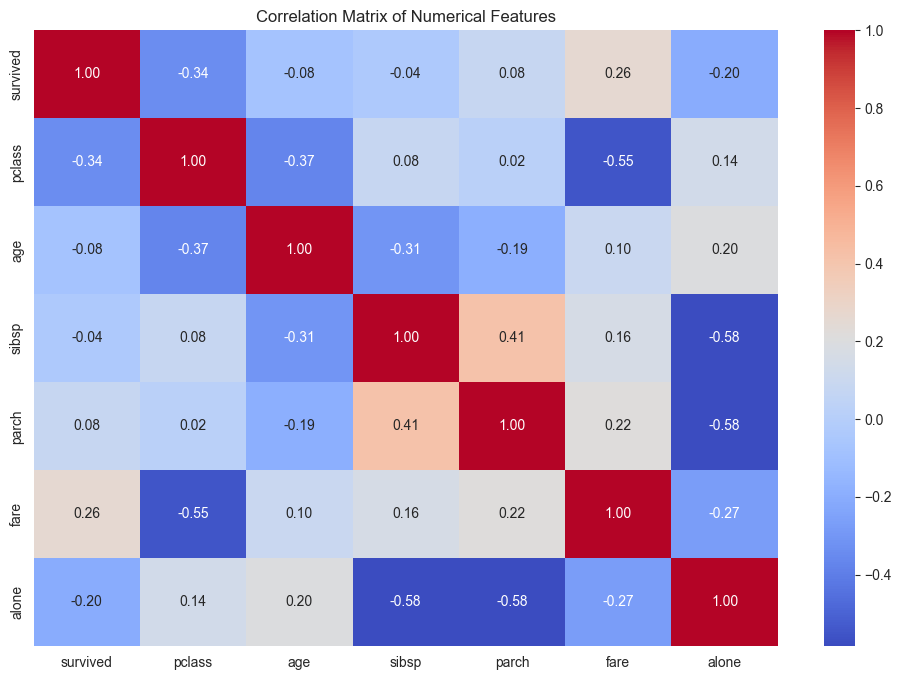

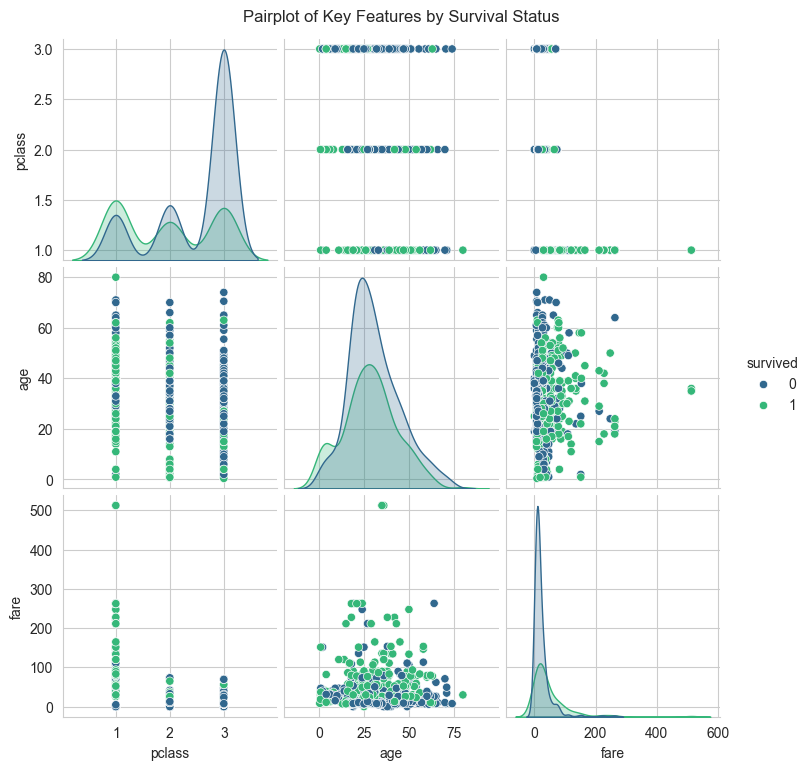

In [6]:
# Calculate the correlation matrix for numerical features
# Note: We need to convert boolean 'alone' to int for this to work
df_corr = df.drop(columns=['who', 'adult_male', 'deck', 'embark_town', 'alive', 'class']) # Drop redundant/string columns
df_corr['alone'] = df_corr['alone'].astype(int)
numerical_cols = df_corr.select_dtypes(include=np.number)
correlation_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Create a pairplot to see relationships between key variables, colored by survival status
# We select a subset of columns to keep the plot readable
pairplot_df = df[['survived', 'pclass', 'age', 'fare', 'sex']]
sns.pairplot(pairplot_df, hue='survived', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Key Features by Survival Status', y=1.02)
plt.show()
